# Content Based Image Retrieval using Color Difference Histogram

In [1]:
# importing libraries
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from IPython.display import Image
img = cv2.imread('F:\Ravi data\Database\Previous images\blast\blast 1.jpg',0)

#width, height, channels = img.shape
#Image('F:\Ravi data\Database\Previous images\blast\blast 1.jpg')

In [24]:
Lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

In [25]:
lnum = 10;
anum = 3;
bnum = 3;
cnum=lnum*anum*bnum;
onum=18;

hist = np.zeros(cnum+onum)
QuantizedImage = np.zeros(width*height).reshape(width,height)

L=a=b=0
for i in range(width):
    for j in range (height):
        L = int(Lab[i][j][0]*lnum/100.0)
        if (L >= (lnum - 1)):
            L = lnum - 1
        elif (L < 0):
            L = 0
        
        a = int(Lab[i][j][1]*anum/254.0)
        if (a >= (anum - 1)):
            a = anum - 1
        elif (a < 0):
            a = 0
            
        b = int(Lab[i][j][2]*bnum/254.0)
        if (b >= (anum - 1)):
            b = anum - 1
        elif (b < 0):
            b = 0            
        
        QuantizedImage[i][j] = (bnum * anum) * L + bnum * a + b
QuantizedImage

array([[4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.],
       ...,
       [4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.]])

In [26]:
def coOrdinateTransform(arr,width,height):
    Lab = np.zeros(3*width*height).reshape(width,height,3)
    for i in range(width):
        for j in range (height):
            Lab[i][j][0] = arr[i][j][0]
            Lab[i][j][1] = arr[i][j][1]
            Lab[i][j][2] = arr[i][j][2]
        
            Lab[i][j][1] = arr[i][j][1] + 127.0
        
            if(Lab[i][j][1] >= 254.0):
                Lab[i][j][1] = 254.0 - 1.0
            if (Lab[i][j][1] < 0):
                Lab[i][j][1] = 0
        
            Lab[i][j][2] = arr[i][j][2] + 127.0
        
            if (Lab[i][j][2] >= 254.0):
                Lab[i][j][2] = 254.0 - 1.0
            if (Lab[i][j][2] < 0):
                Lab[i][j][2] = 0
    return Lab

In [27]:
lab = coOrdinateTransform(Lab,width,height)
lab

array([[[  6., 253., 253.],
        [  6., 253., 253.],
        [  6., 253., 253.],
        ...,
        [  6., 253., 253.],
        [  6., 253., 253.],
        [  6., 253., 253.]],

       [[  6., 253., 253.],
        [  6., 253., 253.],
        [  6., 253., 253.],
        ...,
        [  6., 253., 253.],
        [  6., 253., 253.],
        [  6., 253., 253.]],

       [[  6., 253., 253.],
        [  6., 253., 253.],
        [  6., 253., 253.],
        ...,
        [  6., 253., 253.],
        [  6., 253., 253.],
        [  6., 253., 253.]],

       ...,

       [[  6., 253., 253.],
        [  6., 253., 253.],
        [  6., 253., 253.],
        ...,
        [  6., 253., 253.],
        [  6., 253., 253.],
        [  6., 253., 253.]],

       [[  6., 253., 253.],
        [  6., 253., 253.],
        [  6., 253., 253.],
        ...,
        [  6., 253., 253.],
        [  6., 253., 253.],
        [  6., 253., 253.]],

       [[  6., 253., 253.],
        [  6., 253., 253.],
        [  6., 2

In [28]:
def maxgrad_and_mingrad_Lab(arr, num, wid, hei):
    gxx = gyy = gxy = 0.0
    rh = gh = bh = 0.0
    rv = gv = bv = 0.0
    theta = 0.0
    ori = np.zeros(wid*hei).reshape(wid,hei)
    for i in range(1,wid - 1):
        for j in range(1,hei - 1):
            rh = (arr[i - 1, j + 1, 0] + 2 * arr[i, j + 1, 0] + arr[i + 1, j + 1, 0]) - (arr[i - 1, j - 1, 0] + 2 * arr[i, j - 1, 0] + arr[i + 1, j - 1, 0])
            gh = (arr[i - 1, j + 1, 1] + 2 * arr[i, j + 1, 1] + arr[i + 1, j + 1, 1]) - (arr[i - 1, j - 1, 1] + 2 * arr[i, j - 1, 1] + arr[i + 1, j - 1, 1])
            bh = (arr[i - 1, j + 1, 2] + 2 * arr[i, j + 1, 2] + arr[i + 1, j + 1, 2]) - (arr[i - 1, j - 1, 2] + 2 * arr[i, j - 1, 2] + arr[i + 1, j - 1, 2])

            rv = (arr[i + 1, j - 1, 0] + 2 * arr[i + 1, j, 0] + arr[i + 1, j + 1, 0]) - (arr[i - 1, j - 1, 0] + 2 * arr[i - 1, j, 0] + arr[i - 1, j + 1, 0])
            gv = (arr[i + 1, j - 1, 1] + 2 * arr[i + 1, j, 1] + arr[i + 1, j + 1, 1]) - (arr[i - 1, j - 1, 1] + 2 * arr[i - 1, j, 1] + arr[i - 1, j + 1, 1])
            bv = (arr[i + 1, j - 1, 2] + 2 * arr[i + 1, j, 2] + arr[i + 1, j + 1, 2]) - (arr[i - 1, j - 1, 2] + 2 * arr[i - 1, j, 2] + arr[i - 1, j + 1, 2])

            gxx = rh * rh + gh * gh + bh * bh
            gyy = rv * rv + gv * gv + bv * bv
            gxy = rh * rv + gh * gv + bh * bv

            theta = round(math.atan(2.0 * gxy / (gxx - gyy + 0.00001)) / 2.0, 4)
            G1 = G2 = 0.0

            G1 = math.sqrt(0.5 * ((gxx + gyy) + (gxx - gyy) * math.cos(2.0 * theta) + 2.0 * gxy * math.sin(2.0 * theta)))
            G2 = math.sqrt(0.5 * ((gxx + gyy) + (gxx - gyy) * math.cos(2.0 * (theta + (math.pi / 2.0))) + 2.0 * gxy * math.sin(2.0 * (theta + (math.pi / 2.0)))))

            dir = 0

            if (max(G1, G2) == G1):
                dir = 90.0 + theta * 180.0 / math.pi
                ori[i, j] = int(dir * num / 360.0)
            else:
                dir = 180.0 + (theta + math.pi / 2.0) * 180.0 / math.pi
                ori[i, j] = int(dir * num / 360.0)
            if (ori[i, j] >= num - 1):
                ori[i, j] = num - 1
    return ori 

In [29]:
ori = maxgrad_and_mingrad_Lab(lab, onum, width, height)

In [30]:
    def compute(ColorX,ori,Lab,wid,hei,CSA,CSB,D):
        print("Called!")
        Arr = np.zeros(3 * wid * hei).reshape(wid, hei, 3)
        Arr = coOrdinateTransform(Lab, wid, hei)
        Matrix = np.zeros(CSA + CSB).reshape(CSA + CSB)
        hist = np.zeros(CSA + CSB).reshape(CSA + CSB)

        # -------------------calculate the color difference of different directions------------

        # ----------direction=0--------------------

        for i in range(wid):
            for j in range(hei - D):
                value = 0.0
                if ori[i, j + D] == ori[i, j]:
                    value = math.sqrt(math.pow(Arr[i, j + D, 0] - Arr[i, j,0], 2) + math.pow(Arr[i, j + D, 1]- Arr[i, j, 1], 2) + math.pow(Arr[i,j + D, 2] - Arr[i, j, 2], 2))
                    Matrix[int(ColorX[i, j])] += value
                if ColorX[i, j + D] == ColorX[i, j]:
                    value = math.sqrt(math.pow(Arr[i, j + D, 0] - Arr[i, j,0], 2) + math.pow(Arr[i, j + D, 1]- Arr[i, j, 1], 2) + math.pow(Arr[i,j + D, 2] - Arr[i, j, 2], 2))
                    Matrix[int(ori[i, j] + CSA)] += value

         # -----------direction=90---------------------
        
        for i in range(wid - D):
            for j in range(hei):
                value = 0.0
                if ori[i + D, j] == ori[i, j]:
                    value = math.sqrt(math.pow(Arr[i + D, j, 0] - Arr[i, j,0], 2) + math.pow(Arr[i + D, j, 1]- Arr[i, j, 1], 2) + math.pow(Arr[i+ D, j, 2] - Arr[i, j, 2], 2))
                    Matrix[int(ColorX[i, j])] += value
                if ColorX[i + D, j] == ColorX[i, j]:
                    value = math.sqrt(math.pow(Arr[i + D, j, 0] - Arr[i, j,0], 2) + math.pow(Arr[i + D, j, 1]- Arr[i, j, 1], 2) + math.pow(Arr[i+ D, j, 2] - Arr[i, j, 2], 2))
                    Matrix[int(ori[i, j] + CSA)] += value

       # -----------direction=135---------------------
        for i in range(wid - D):
            for j in range(hei - D):
                value = 0.0
                if ori[i + D, j + D] == ori[i, j]:
                    value = math.sqrt(math.pow(Arr[i + D, j + D, 0]- Arr[i, j, 0], 2) + math.pow(Arr[i+ D, j + D, 1] - Arr[i, j, 1], 2)+ math.pow(Arr[i + D, j + D, 2]- Arr[i, j, 2], 2))
                    Matrix[int(ColorX[i, j])] += value
                if ColorX[i + D, j + D] == ColorX[i, j]:
                    value = math.sqrt(math.pow(Arr[i + D, j + D, 0]- Arr[i, j, 0], 2) + math.pow(Arr[i+ D, j + D, 1] - Arr[i, j, 1], 2)+ math.pow(Arr[i + D, j + D, 2]- Arr[i, j, 2], 2))
                    Matrix[int(ori[i, j] + CSA)] += value
                
        # -----------direction=45---------------------
        
        for i in range(D, wid):
            for j in range(hei - D):
                value = 0.0
                if ori[i - D, j + D] == ori[i, j]:
                    value = math.sqrt(math.pow(Arr[i - D, j + D, 0]- Arr[i, j, 0], 2) + math.pow(Arr[i- D, j + D, 1] - Arr[i, j, 1], 2)+ math.pow(Arr[i - D, j + D, 2]- Arr[i, j, 2], 2))
                    Matrix[int(ColorX[i, j])] += value
                if ColorX[i - D, j + D] == ColorX[i, j]:
                    value = math.sqrt(math.pow(Arr[i - D, j + D, 0]- Arr[i, j, 0], 2) + math.pow(Arr[i- D, j + D, 1] - Arr[i, j, 1], 2)+ math.pow(Arr[i - D, j + D, 2]- Arr[i, j, 2], 2))
                    Matrix[int(ori[i, j] + CSA)] += value
                    
        for i in range(CSA + CSB):
            hist[i] = (Matrix[i]) / 4.0
            
        print(hist)
        return hist


In [31]:
D = 1
hist = compute(QuantizedImage,ori,Lab,width,height,cnum,onum,D)

Called!
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.42307725e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.39655910e+04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.83503309e+01 1.41238236e+04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.65176922e+02 1.09943861e+04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.21126658e+03
 7.43906468e+03 0.00000000e+00 9.11702023e+01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.34186199e+03 5.18494912e+03 0.00000000e+00 1.05922961e+03
 7.77330120e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.55896192e+03 5.92044804e+03 0.00000000e+00
 8.60572411e+02 1.80527780e+02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 

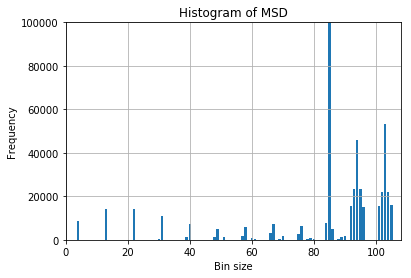

In [35]:
plt.axis([0, len(hist), 0, 100000])
plt.bar(np.arange(len(hist)),hist)
plt.xlabel('Bin size')
plt.ylabel('Frequency')
plt.title('Histogram of MSD')
plt.grid(True)

plt.show()